In [1]:
# CCA Means Complete Case Analysis
# Means Remove Row or Collumn where missing values are present

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/home/yash/Downloads/data_science_job.csv")
df.head(7)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11.0,NaN,NaN,24.0,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5.0,50-99,Funded Startup,24.0,0.0


In [4]:
df.shape

(19158, 13)

In [5]:
df.isnull().mean()*100
# it give % of missing values 

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
cols = [x for x in df.columns if df[x].isnull().mean()*100 < 5 and df[x].isnull().mean()*100 > 0]
cols
# it find collumn where missing values percentage is less than 5% and more than 0%

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df[cols].sample(10,random_state = 0)

,city_development_index,enrolled_university,education_level,experience,training_hours
12777,0.939,no_enrollment,Graduate,17.0,57.0
7926,0.920,no_enrollment,Masters,10.0,129.0
13990,0.926,no_enrollment,Graduate,2.0,48.0
14158,0.910,no_enrollment,Graduate,11.0,17.0
15652,0.939,Part time course,Graduate,8.0,29.0
18777,0.624,Part time course,Graduate,8.0,62.0
13533,0.939,no_enrollment,Graduate,15.0,105.0
11537,0.563,Full time course,Graduate,5.0,119.0
7492,0.827,no_enrollment,Masters,4.0,11.0
7712,0.698,no_enrollment,NaN,6.0,18.0


In [8]:
(len(df[cols].dropna())/len(df))*100
# it returns percentage of data remaining after drop data with missing values

89.68577095730244

In [9]:
new_df = df[cols].dropna()
new_df.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0


In [10]:
df.shape,new_df.shape

((19158, 13), (17182, 5))

<Axes: >

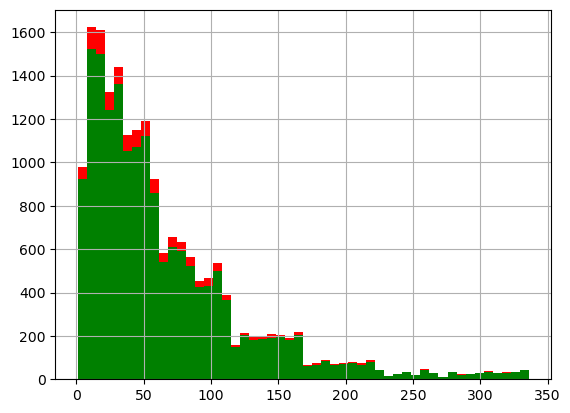

In [11]:
fig = plt.figure()
df["training_hours"].hist(color = "Red",bins = 50)
new_df["training_hours"].hist(color = "Green",bins = 50)

<Axes: >

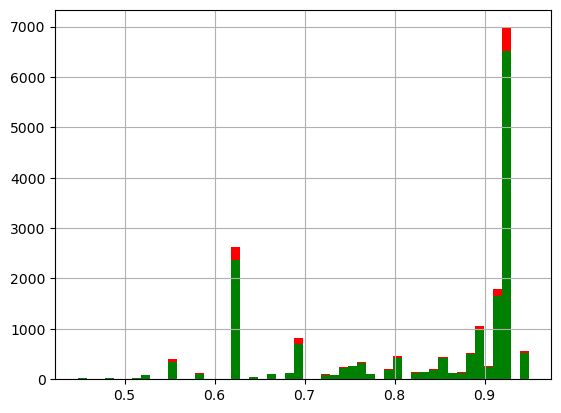

In [12]:
fig = plt.figure()
df["city_development_index"].hist(color = "Red",bins = 50)
new_df["city_development_index"].hist(color = "Green",bins = 50)

<Axes: >

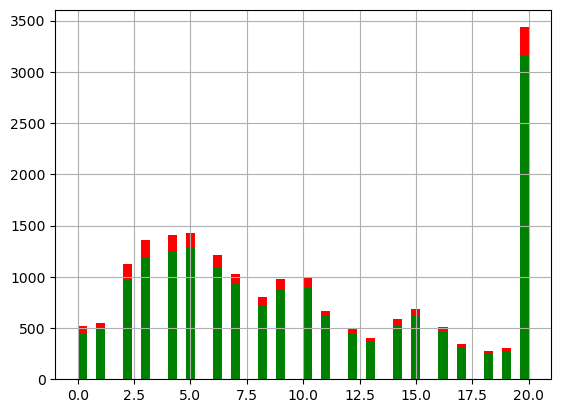

In [13]:
fig = plt.figure()
df["experience"].hist(color = "Red",bins = 50)
new_df["experience"].hist(color = "Green",bins = 50)

In [14]:
new_df["enrolled_university"].value_counts()

enrolled_university
no_enrollment       12632
Full time course     3449
Part time course     1101
Name: count, dtype: int64

In [15]:
temp = pd.concat([
    # percantage of observation per category, original data
    df["enrolled_university"].value_counts()/len(df),
    
    # percantage of observation per category, cca data
    new_df["enrolled_university"].value_counts()/len(new_df)
],axis = 1)
temp.columns = ["Original","CCA"] # Add Collumn

temp

,Original,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [16]:
new_df["education_level"].value_counts()

education_level
Graduate          10650
Masters            4022
High School        1845
Phd                 380
Primary School      285
Name: count, dtype: int64

In [ ]:
temp = pd.concat([
    # percantage of observation per category, original data
    df["education_level"].value_counts()/len(df),
    
    # percantage of observation per category, cca data
    new_df["education_level"].value_counts()/len(new_df)
],axis = 1)
temp.columns = ["Original","CCA"] # Add Collumn

temp

,Original,CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
